# <font color ='gold'><font size=5>**_Análise Exploratória: Preços dos Combustíveis no Brasil (Agosto-Julho/2022)_** </font>

<img src="https://media.ale.com.br/uploads/2021/07/tipos-de-combustiveis-existentes-em-um-posto-de-servicos-1.png" width=1000 height=350>

## **<font color ='gold'><font size=4>1. Descrição e Objetivo do Projeto</font>** 🎯

--- 
Nesse projeto, fomos escalados pela <font color='02A711'>**_Agência Nacional de Petróleo e Gás Natural e Biocombustíveis (ANP)_**</font> para realizar uma análise exploratória relacionada à série histórica de preço de venda da gasolina e do etanol. Utilizaremos os arquivos dos meses de Julho e Agosto de 2022 contendo a série histórica dos preços da gasolina e do etanol em todo o Brasil que estão disponíveis no portal [dados.gov.br](https://dados.gov.br/dataset/serie-historica-de-precos-de-combustiveis-por-revenda).

Com um dataset desse tipo (precificação de combustíveis), podemos abordar a análise buscando questionar os dados em busca de certas informações, com o objetivo de compreender a variação desses valores em todo território nacional.

---

<font color='gold'>**1.1. Detalhes:**</font>

As perguntas a ser respondidas são:

- <font color='gold'>**1.**</font> **_Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou aumento?_**

- <font color='gold'>**2.**</font> **_Qual o preço médio da gasolina e do etanol nesses dois meses?_**

- <font color='gold'>**3.**</font> **_Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?_**

- <font color='gold'>**4.**</font> **_Qual o preço médio da gasolina e do etanol por estado?_**

- <font color='gold'>**5.**</font> **_Qual o município que possui o menor preço para a gasolina e para o etanol?_**

- <font color='gold'>**6.**</font> **_Qual o município que possui o maior preço para a gasolina e para o etanol?_**

- <font color='gold'>**7.**</font> **_Qual a região que possui o maior valor médio da gasolina?_**

- <font color='gold'>**8.**</font> **_Qual a região que possui o menor valor médio do etanol?_**

- <font color='gold'>**9.**</font> **_Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?_**

- <font color='gold'>**10.**</font> **_Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?_**

Com elas, poderemos ter uma compreensão melhor acerca dos fatos em torno da precificação dos combustíveis no Brasil. 

Também iremos realizar algumas análises extras, que julgamos pertinentes no contexto do DataSet.

---

<font color='gold'>**1.2. Análises Extras:**</font>

- <font color='gold'>**1.**</font> **_Quais dias da semana tendem a vender mais gasolina (por região)._**

- <font color='gold'>**2.**</font> **_Plotar um Mapa do Brasil com as vendas por estado._**

---

<font color='gold'>**1.3. Metodologia:**</font>

 - Utilizaremos o Jupyter Notebook para a realização das análises;

 - Realizaremos a limpeza dos dados;

 - Realizaremos a análise exploratória do DataSet;

 - Abordaremos cada uma das perguntas com a visualização mais adequada utilizando gráficos;

 - O notebook utilizado na análise estará organizado, com descrições do passo a passo da análise em markdown, apresentando os resultados e insights gerados;

## **<font color ='gold'><font size=4>2. Coleta e Análise Inicial dos Dados</font>** 📋

Primeiramente, para podermos iniciar nossos trabalhos, iremos coletar nossos dados e ter nosso primeiro contato com eles, compreendendo suas características que o definem e sua estrutura.

---

##### **<font color ='gold'><font size=4>2.1. Coleta</font>**

Por meio do supracitado portal [dados.gov.br](https://dados.gov.br/dataset/serie-historica-de-precos-de-combustiveis-por-revenda), iremos baixar dois arquivos CSV que contém as informações dos preços dos combustíveis em relação aos meses de <font color='FAFACC'>**Julho e Agosto**</font> respectivamente.

---

- <font color='9E36CE'>**_Importando_**</font> <font color='FAFACC'>**_as bibliotecas que serão utilizadas para nosso manuseio dos dados:_**


In [2]:
#!pip install geopy
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from geopy.geocoders import Nominatim
import folium
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="darkgrid")

- <font color='FAFACC'>**_Carregando o DataSet em relação a Julho:_**

In [3]:
comb_jul = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-gasolina-etanol-07.csv', delimiter=';')
comb_jul.head(1)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,"7,48",NaN,R$ / litro,VIBRA ENERGIA


- <font color='FAFACC'>**_Carregando o DataSet em relação a Agosto:_**

In [4]:
comb_ago = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-gasolina-etanol-08.csv', delimiter=';')
comb_ago.head(1)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,RODOVIA AL-220,5848,KM 96,BOM SUCESSO,57309-035,ETANOL,01/08/2022,"4,79",NaN,R$ / litro,VIBRA ENERGIA


- <font color='FAFACC'>**_Concatenando os dois DataSets para facilitar a manipulação dos dados:_**

In [5]:
conjunto_dados = pd.concat([comb_jul, comb_ago])
conjunto_dados.head(1)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,"7,48",NaN,R$ / litro,VIBRA ENERGIA


##### **<font color ='gold'><font size=4>2.2. Análise Inicial do DataSet</font>**

Com nosso DataSet carregado, iremos realizar uma análise exploratória inicial dos dados, buscando compreendê-los e descrevê-los de maneira que possamos ter uma visão completa do Banco de Dados em mãos.

Essa etapa é essencial para o projeto, pois é a partir daqui que teremos a compreensão acerca desses dados, para em seguida podermos realizar o tratamento apropriado deles, assim possibilitando a resolução das perguntas postuladas no início.

- <font color='FAFACC'>**_Checando a dimensão do DataSet concatenado:_**

In [6]:
conjunto_dados.shape

(127176, 16)

Com essa checagem, podemos verificar que nosso DataSet contém <font color='FAFACC'>**127.176**</font> linhas/registros por <font color='FAFACC'>**16**</font> colunas/variáveis.

Com um número tão expressívo de colunas, é interessante realizarmos um dicionário que contenha uma explicação do que cada uma dessas colunas representa e abriga no DataSet.

- <font color='FAFACC'>**_Verificação e listagem das colunas presentes no DataSet:_**

In [7]:
conjunto_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127176 entries, 0 to 69543
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao - Sigla     127176 non-null  object 
 1   Estado - Sigla     127176 non-null  object 
 2   Municipio          127176 non-null  object 
 3   Revenda            127176 non-null  object 
 4   CNPJ da Revenda    127176 non-null  object 
 5   Nome da Rua        127176 non-null  object 
 6   Numero Rua         127105 non-null  object 
 7   Complemento        27079 non-null   object 
 8   Bairro             126764 non-null  object 
 9   Cep                127176 non-null  object 
 10  Produto            127176 non-null  object 
 11  Data da Coleta     127176 non-null  object 
 12  Valor de Venda     127176 non-null  object 
 13  Valor de Compra    0 non-null       float64
 14  Unidade de Medida  127176 non-null  object 
 15  Bandeira           127176 non-null  object 
dtypes: 

<font color='FAFACC'>**_Com essas informações, podemos definir e compreender as colunas em relação aos dados da revenda pesquisada dos combustíveis:_**
        
* **`Regiao - Sigla`** - Sigla da Região.

* **`Estado - Sigla`** - Sigla da Unidade Federativa (UF).

* **`Municipio`** - Nome do município.

* **`Revenda`** - Nome do estabelecimento.

* **`CNPJ da Revenda`** - Número do Cadastro Nacional de Pessoa Jurídica.

* **`Nome da Rua`** - Nome do logradouro.

* **`Numero da Rua`** - Número do logradouro.

* **`Complemento`** - Complemento do logradouro.

* **`Bairro`** - Nome do bairro.

* **`Cep`** - Número do Código do Endereço Postal (CEP) do logradouro.

* **`Produto`** - Nome do combustível pesquisado.

* **`Data da Coleta`** - Data da coleta do(s) preço(s).

* **`Valor de Venda`** - Preço de venda ao consumidor final praticado pelo revendedor, na data da coleta.

* **`Valor de Compra`** - Preço de distribuição (preço de venda da distribuidora para o posto revendedor de combustível)**. 

* **`Unidade de Medida`** - Unidade de Medida.

* **`Bandeira`** - Nome da Bandeira da revenda.***



*<font size=2>Informações acerca do significado de cada coluna disponível para visualização e consulta no [PDF oficial](https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/metadados-serie-historica-precos-combustiveis.pdf) que acompanha o banco de dados.

**<font size=2>Série disponível apenas até agosto de 2020 no momento da realização do presente projeto de Análise de Dados.

***<font size=2>O Posto bandeirado é aquele que opta por exibir a marca comercial de um distribuidor, o posto deverá vender somente combustíveis fornecidos pelo distribuidor detentor da marca comercial exibida aos consumidores. Já o Posto bandeira branca é o que opta por não exibir marca comercial de nenhuma distribuidora. (informações retiradas do PDF oficial)


Outra informação importante que conseguimos ver é o Dtype (tipo de dados) presentes em cada uma das colunas.

Todas estão no formato **_object_** (**_str_**), tendo apenas a coluna `Valor de Compra` no formato **_float64_**.

---

<font color='FAFACC'>**_Com nossas colunas categorizadas e descritas, podemos checar outra informação importante: O percentual de valores nulos em cada uma delas:_**

In [8]:
(((conjunto_dados.isnull().sum() / conjunto_dados.shape[0]) * 100).sort_values(ascending=False)).round(4)

Valor de Compra      100.0000
Complemento           78.7075
Bairro                 0.3240
Numero Rua             0.0558
Regiao - Sigla         0.0000
Estado - Sigla         0.0000
Municipio              0.0000
Revenda                0.0000
CNPJ da Revenda        0.0000
Nome da Rua            0.0000
Cep                    0.0000
Produto                0.0000
Data da Coleta         0.0000
Valor de Venda         0.0000
Unidade de Medida      0.0000
Bandeira               0.0000
dtype: float64

Podemos reparar que duas colunas se sobressaem, sendo elas a coluna de `Valor de Compra` que possui <font color='FAFACC'>**_100% dos seus valores nulos_**</font>, e a coluna `Complemento` que possui cerca de <font color='FAFACC'>**_79% de seus valores nulos._**</font>

A partir disso, precisamos abordar certas mudanças em algumas das colunas durante o processo de limpeza do DataSet. Sendo elas:

- Resetar o index do DataFrame concatenado;

- Retirar a coluna `Valor de Compra`, pois a mesma é composta apenas por <font color='FAFACC'>**_valores NaN;_**</font>
- Alterar o Dtype da coluna `Valor de Venda` de <font color='FAFACC'>**_str_**</font> para <font color='FAFACC'>**_float64_**</font>, para podermos realizar operações e análises a partir dela;
- Preencher os valores NaN da coluna `Complemento`, já que eles compõe cerca de 79% dos registros.
- Alterar o Dtype da coluna `Data da Coleta` de str para DateTime, para podermos realizar filtragens e pesquisas a partir das datas;

Algumas mudanças extras também serão realizadas, sendo elas:

- Criação de uma nova coluna para alocar os dias da semana que as datas representam;
    - Essa adição será feita para possibilitar a resolução da primeira questão extra.

- Passar as strings do DataSet para um formato mais limpo, mais legível, pois todas elas estão em maiúsculas.

Com esse tratamento dos dados, poderemos aprofundar mais nossa análise exploratória e compreender ainda melhor o nosso DataSet.

## **<font color ='gold'><font size=4>3. Tratamento dos Dados</font>** 📁

A partir das análises iniciais realizadas no DataSet, iremos tratar os dados de forma que o trabalho de Análise e resposta das perguntas postuladas, sejam realizados da melhor maneira possível.

---

##### **<font color ='gold'><font size=4>3.1. Alterações e Limpeza de Colunas</font>**

Seguindo com nossas pontuações anteriores, iremos aqui tratar as colunas do DataSet.

---

- <font color='FAFACC'>**_Resetando o Index no DataFrame concatenado:_**

In [9]:
conjunto_dados.reset_index(0, drop=True, inplace=True)

- <font color='FAFACC'>**_Retirando a coluna_** </font> `Valor de Compra`<font color='FAFACC'> **_do DataFrame, pois a mesma contém apenas valores nulos:_**

In [10]:
conjunto_dados.drop('Valor de Compra', axis=1, inplace=True)

- <font color='FAFACC'>**_Transformando os valores da coluna_** </font>`Valor de Venda` <font color='FAFACC'>**_para float:_**


In [11]:
conjunto_dados['Valor de Venda'] = conjunto_dados['Valor de Venda'].apply(lambda y: float(str(y.replace(',','.'))))

- <font color='FAFACC'>**_Preenchendo valores nulos da coluna_**</font> `Complemento` <font color='FAFACC'>**_com 0:_**

In [12]:
conjunto_dados.Complemento.fillna('0', inplace=True)

- <font color='FAFACC'>**_Transformando as datas da coluna_**</font> `Data da Coleta` <font color='FAFACC'> **_para datetime:_**

In [13]:
conjunto_dados['Data da Coleta'] = pd.to_datetime(conjunto_dados['Data da Coleta'], format='%d/%m/%Y')

Também utilizaremos algumas funções para serem aplicadas no DataFrame.

- <font color='FAFACC'>**_Função <font color='1D9BDA'>lambda</font> para passar strings de maiúsculas para minúsculas no DataFrame:_**

In [14]:
to_title = lambda x: x.title() if isinstance(x, str) else x

- <font color='FAFACC'>**_Criando função que acrescenta coluna de dias da semana:_**

In [15]:
def cria_semanas(df):
    dias_semana = {'Sunday':'Domingo', 'Monday':'Segunda', 'Tuesday':'Terça', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sábado'}
    df['Dias da Semana'] = df['Data da Coleta'].apply(lambda x: x.strftime('%A'))
    df['Dias da Semana'] = df['Dias da Semana'].replace(dias_semana)
    return df

**Agora podemos aplicar nossas funções no nosso DataFrame.**

- <font color='FAFACC'>**_Criando a coluna de dias da semana:_**

In [16]:
conjunto_dados = cria_semanas(conjunto_dados)

- <font color='FAFACC'>**_Passando strings para minúsculas no DataFrame:_**

In [17]:
conjunto_dados['Municipio'] = conjunto_dados['Municipio'].apply(to_title)
conjunto_dados['Revenda'] = conjunto_dados['Revenda'].apply(to_title)
conjunto_dados['Nome da Rua'] = conjunto_dados['Nome da Rua'].apply(to_title)
conjunto_dados['Complemento'] = conjunto_dados['Complemento'].apply(to_title)
conjunto_dados['Bairro'] = conjunto_dados['Bairro'].apply(to_title)
conjunto_dados['Produto'] = conjunto_dados['Produto'].apply(to_title)
conjunto_dados['Bandeira'] = conjunto_dados['Bandeira'].apply(to_title)

**Com todas essas alterações realizadas, vamos primeiramente checar novamente nossos DataTypes das colunas.**

In [18]:
conjunto_dados.dtypes

Regiao - Sigla               object
Estado - Sigla               object
Municipio                    object
Revenda                      object
CNPJ da Revenda              object
Nome da Rua                  object
Numero Rua                   object
Complemento                  object
Bairro                       object
Cep                          object
Produto                      object
Data da Coleta       datetime64[ns]
Valor de Venda              float64
Unidade de Medida            object
Bandeira                     object
Dias da Semana               object
dtype: object

Como podemos ver, nossas mudanças foram realizadas com sucesso, agora temos os tipos de dados corretos para as colunas apropriadas.

Vamos visualizar os 5 registros iniciais do DataFrame:

In [19]:
conjunto_dados.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira,Dias da Semana
0,SE,ES,Colatina,Sao Francisco De Assis Comercio De Combustivei...,08.519.545/0001-10,Praca Fidelis Ferrari,35,0,Lace,29703-030,Gasolina Aditivada,2022-07-01,7.48,R$ / litro,Vibra Energia,Sexta
1,SE,ES,Colatina,Sao Francisco De Assis Comercio De Combustivei...,08.519.545/0001-10,Praca Fidelis Ferrari,35,0,Lace,29703-030,Gasolina,2022-07-01,7.38,R$ / litro,Vibra Energia,Sexta
2,SE,ES,Colatina,Posto Motocap Ltda,04.814.652/0001-10,Praca Almirante Barroso,52,Letra A,Lace,29703-055,Etanol,2022-07-01,5.99,R$ / litro,Vibra Energia,Sexta
3,SE,ES,Colatina,Posto Motocap Ltda,04.814.652/0001-10,Praca Almirante Barroso,52,Letra A,Lace,29703-055,Gasolina,2022-07-01,7.39,R$ / litro,Vibra Energia,Sexta
4,CO,GO,Goiania,Justiniano & Justiniano Ltda,04.489.287/0001-16,Avenida Jose Leandro Da Cruz,"2,36","Quadra 18, Lote 01",Parque Amazonia,74840-390,Gasolina Aditivada,2022-07-01,6.49,R$ / litro,Ipiranga,Sexta


##### **<font color ='gold'><font size=4>3.2. Checando Outliers</font>**

Com o DataSet devidamente organizado e limpo, partimos para a etapa de checar a situação de valores Outliers nos dados. Essa etapa será relativamente simples pois a única coluna dos nossos dados que permite esse tipo de checagem, ou seja, a única coluna com valores numéricos, é a de `Valor de Venda`.

Para realizar essa checagem, aplicaremos alguns métodos:

- Uma análise do resumo estatístico dos valores da coluna utilizando o método `describe()`;

- Plotagem de um `histograma` para termos uma visualização gráfica da distribuição dos dados;

- Plotagem de um `boxplot`, o que deixará evidente onde e quantos são os outliers, caso existam, na coluna.

---

- <font color='FAFACC'>**_Resumo estatístico dos valores com o método describe:_**

In [67]:
conjunto_dados.describe().round(3)

,Valor de Venda
count,127176.000
mean,5.356
std,0.860
min,2.890
25%,4.880
50%,5.490
75%,5.890
max,9.270


Com isso, podemos ter uma compreensão mais apurada acerca da coluna, notavelmente: 

- Temos a contagem dos registros: <font color='FAFACC'>**_127.176_**</font>;

- A média dos preços de venda dos combustíveis é de cerca de <font color='0CB213'>`R$5.356`</font>;
- Temos um desvio padrão relativamente baixo, de <font color='FAFACC'>**_0.860_**;</font>
- O valor mais baixo registrado no DataSet é de <font color='0CB213'>`R$2.890`</font>;
- O valor mais alto registrado foi de <font color='0CB213'>`R$9.270`</font>.

Além disso, temos as informações acerca da distribuição desses dados:

- <font color='FAFACC'>25%</font> dos dados vão até <font color='0CB213'>`R$4.880`</font>;

- <font color='FAFACC'>50%</font> dos dados vão até <font color='0CB213'>`R$5.490`</font>;

- <font color='FAFACC'>75%</font> dos dados vão até <font color='0CB213'>`R$5.890`</font>;

---

Com essas informações, podemos observar uma anomalia. Temos <font color='FAFACC'>até 75%</font> dos valores indo até <font color='0CB213'>`R$5.890`</font>, porém, o valor máximo é de <font color='0CB213'>`R$9.270`</font>. 

In [70]:
conjunto_dados['Valor de Venda'].quantile(.99)

7.33

Podemos observar também que <font color='FAFACC'>99%</font>  dos valores se encontram numa faixa de preço que está a <font color='0CB213'>`R$1.94`</font> abaixo do valor máximo, e indica a presença de outliers.

Para termos outras visualizações disso, <font color='FAFACC'>vamos plotar um histograma da coluna</font> `Valor de Venda`:


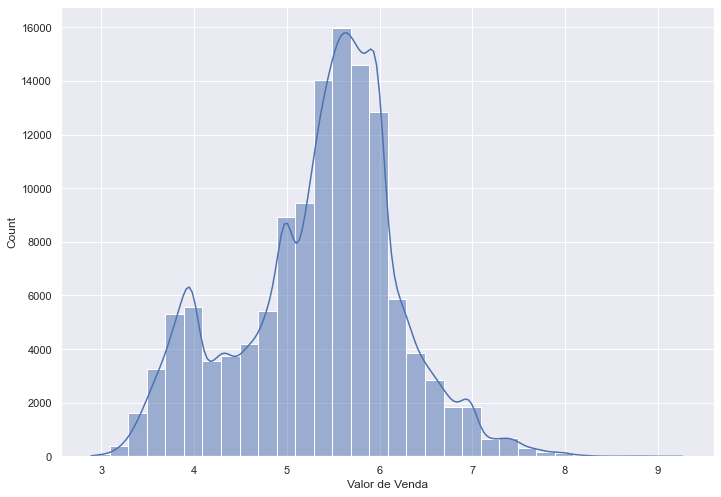

In [71]:
sns.histplot(data=conjunto_dados['Valor de Venda'], kde=True, binwidth=0.2)
plt.show()

Com o histograma, podemos notar uma distribuição que tende mais a esquerda dos valores, onde as barras são visíveis até por volta de  <font color='0CB213'>`R$7`</font> e <font color='0CB213'>`R$8`</font> porém o gráfico demonstra que temos valores até <font color='0CB213'>`R$9`</font> e acima, indicando novamente os outliers.

- <font color='FAFACC'>Vamos plotar um boxplot, para checar efetivamente esses valores.

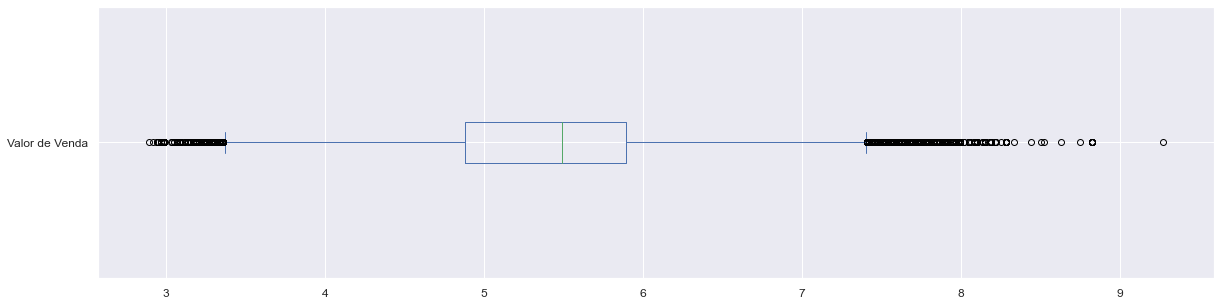

Valores de Venda acima de R$7,50:
638 entradas
0.5017%
=+==+==+==+==+==+==+==+==+==+==+==+==+==+==+=
Valores de Venda abaixo de R$3,20:
195 entradas
0.1533%


In [22]:
conjunto_dados['Valor de Venda'].plot(kind='box', vert=False, figsize=(20, 5), fontsize=12)
plt.show()

print("Valores de Venda acima de R$7,50:")
print("{} entradas".format(len(conjunto_dados[conjunto_dados['Valor de Venda'] > 7.5])))
print("{:.4f}%".format((len(conjunto_dados[conjunto_dados['Valor de Venda'] > 7.5]) / conjunto_dados.shape[0])*100))
print("=+="*15)
print("Valores de Venda abaixo de R$3,20:")
print("{} entradas".format(len(conjunto_dados[conjunto_dados['Valor de Venda'] < 3.2])))
print("{:.4f}%".format((len(conjunto_dados[conjunto_dados['Valor de Venda'] < 3.2]) / conjunto_dados.shape[0])*100))

Com o boxplot, podemos ver que temos outliers tanto acima quanto abaixo dos quartis em si. 

- Temos <font color='FAFACC'>**_638 valores_**</font> acima de <font color='0CB213'>`R$7,50`</font> e <font color='FAFACC'>**_195 valores_**</font> abaixo de <font color='0CB213'>`R$3,20`</font>.

Nesse caso específico, achamos válido seguir com as análises mantendo os outliers, devido a natureza do nosso DataSet.

Como ele é composto por valores de <font color='0CB213'>`três combustíveis diferentes`</font> pesquisados em <font color='0CB213'>`todas as regiões do Brasil`</font>, essa variância nos dados é esperada e sentimos que remover esses valores, poderia fornecer uma análise não tão precisa da realidade dos fatos, pois com esses outliers, podemos observar alguns fenômenos:

- A precificação dos combustíveis em todo território nacional aparentemente não possui uma regularização tão abrangente, o que é mostrado na variância desses dados;

- Essa variância de preço entre as regiões pode estar ligada a alguns fatores como infraestrutura, local de coleta e produção desses combustíveis, métodos de transporte, impostos locais em cima dos produtos, etc.


No entanto, nesse projeto buscamos responder sumariamente às perguntas do escopo do projeto. Desta forma, <font color='0CB213'>`optamos por manter e trabalhar`</font> com esses outliers.

## **<font color ='gold'><font size=4>4. Respondendo Perguntas</font>** ✅

Com essas verificações e tratamentos feitos, vamos dar inicio ao nosso trabalho de resolução das nossas perguntas iniciais.

---

##### **<font color ='gold'><font size=4>4.1. Como se comportam o preço dos combustíveis durante os dois meses citados? (Jul/Ago) Os valores do etanol e da gasolina tiveram uma tendência de queda ou aumento?</font>**

---

- <font color='FAFACC'>**_Primeiramente, dividiremos o nosso DataFrame entre os meses de Julho e Agosto:_**

In [23]:
comb_jul = conjunto_dados[(conjunto_dados['Data da Coleta'] < '2022-08-01')] 
comb_ago = conjunto_dados[(conjunto_dados['Data da Coleta'] > '2022-08-01')]

- <font color='FAFACC'>**_Criando DataFrames dos preços de combustíveis para julho e agosto, subdividindo os DataFrames acima para conter a sigla da região e a média de preço dos combustíveis:_**

In [24]:
preco_comb_jul = comb_jul.groupby(['Regiao - Sigla']).mean()
preco_comb_jul.columns = ['Preço Médio']

preco_comb_ago = comb_ago.groupby(['Regiao - Sigla']).mean()
preco_comb_ago.columns = ['Preço Médio']

- <font color='FAFACC'>**_Plotando gráfico para visualização dos dados e para identificarmos qual foi a tendência dos valores dos combustíveis:_**

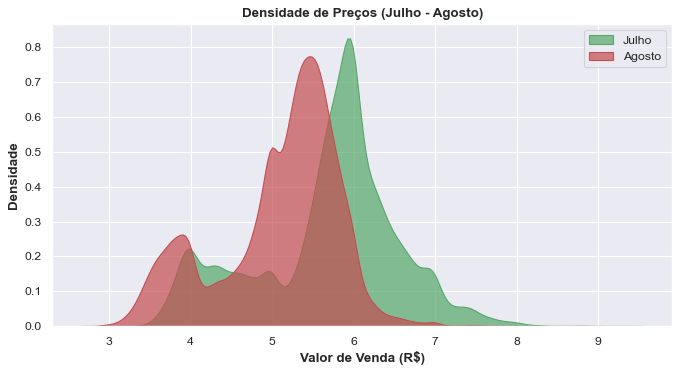

In [75]:
plt.figure(figsize=(10, 5), dpi=80)

sns.kdeplot(comb_jul['Valor de Venda'], shade=True, color='g', label='Julho', alpha=.7)
sns.kdeplot(comb_ago['Valor de Venda'], shade=True, color='r', label='Agosto', alpha=.7)

plt.title('Densidade de Preços (Julho - Agosto)', fontsize=12, fontweight='bold')
plt.ylabel('Densidade', fontsize=12, fontweight='bold')
plt.xlabel('Valor de Venda (R$)', fontsize=12, fontweight='bold')
plt.legend()
plt.show()

Identificamos que existe uma clara <font color='0CB213'>`tendência de queda`</font> no preço dos combustíveis entre o mês de Julho e Agosto. O gráfico de <font color='FAFACC'>**_Agosto_**</font> se posiciona mais a esquerda, indicando <font color='0CB213'>`menores valores`</font>, e possui um pico mais baixo do que o gráfico de Julho.

Além disso, percebemos que a <font color='0CB213'>`densidade de valores mais baixos aumentou`</font>, fazendo com que o pico da primeira onda vermelha seja consideravelmente maior do que a de Julho.
- <font color='FAFACC'>**_Apresentando os valores agrupados em um formato de tabela:_**</font>

In [91]:
print('VALORES MÉDIOS DOS COMBUSTÍVEIS POR REGIÃO (JULHO):')
display(preco_comb_jul.sort_values(by='Preço Médio', ascending=True))
print()
print()
print('VALORES MÉDIOS DOS COMBUSTÍVEIS POR REGIÃO (AGOSTO):')
display(preco_comb_ago.sort_values(by='Preço Médio', ascending=True))
print()
print()
print('DIFERENÇA AGOSTO - JULHO')
preco_comb_ago - preco_comb_jul

VALORES MÉDIOS DOS COMBUSTÍVEIS POR REGIÃO (JULHO):


,Preço Médio
Regiao - Sigla,
CO,5.326755
SE,5.408082
S,5.775341
NE,6.206380
N,6.213738




VALORES MÉDIOS DOS COMBUSTÍVEIS POR REGIÃO (AGOSTO):


,Preço Médio
Regiao - Sigla,
CO,4.803764
SE,4.890828
S,5.224502
NE,5.369108
N,5.594068




DIFERENÇA AGOSTO - JULHO


,Preço Médio
Regiao - Sigla,
CO,-0.522991
N,-0.619671
NE,-0.837272
S,-0.550839
SE,-0.517254


Comparando os valores de cada região separadamente, observamos novamente que existe uma tendência de queda nos valores dos combustíveis.

##### **<font color ='gold'><font size=4>4.2. Qual o preço médio da gasolina e do etanol nesses dois meses?</font>**

- <font color='FAFACC'>**_Separando os combustíveis e argumentos, cores:_**

In [27]:
# Definindo eixos para plotagem posterior do gráfico
x_col = 'Data da Coleta'
y_col = 'Valor de Venda'

# Criando uma cópia do DataFrame original e alterando o nome da coluna 'Região - Sigla' para 'Região'
conjunto_dados_reg = conjunto_dados.copy()
conjunto_dados_reg.rename(columns={'Regiao - Sigla':'Regiao'}, inplace=True)

# Subdividindo a cópia do DataFrame em três, um para cada produto
etanol = conjunto_dados_reg.loc[conjunto_dados_reg['Produto'] == 'Etanol']
gasolina = conjunto_dados_reg.loc[conjunto_dados_reg['Produto'] == 'Gasolina']
gasolina_aditivada = conjunto_dados_reg.loc[conjunto_dados_reg['Produto'] == 'Gasolina Aditivada']

# Definindo cores para plotagem das linhas no gráfico a seguir
corcentro='#CF0000'
cornorte='#7ECA9C'
cornordeste='#E48900'
corsudeste='#005F99'
corsul = '#440A67'

**_Agora podemos plotar um gráfico de linhas do Seaborn, para ver o <font color='FAFACC'>histórico da precificação média</font> de cada combustível por região:_**

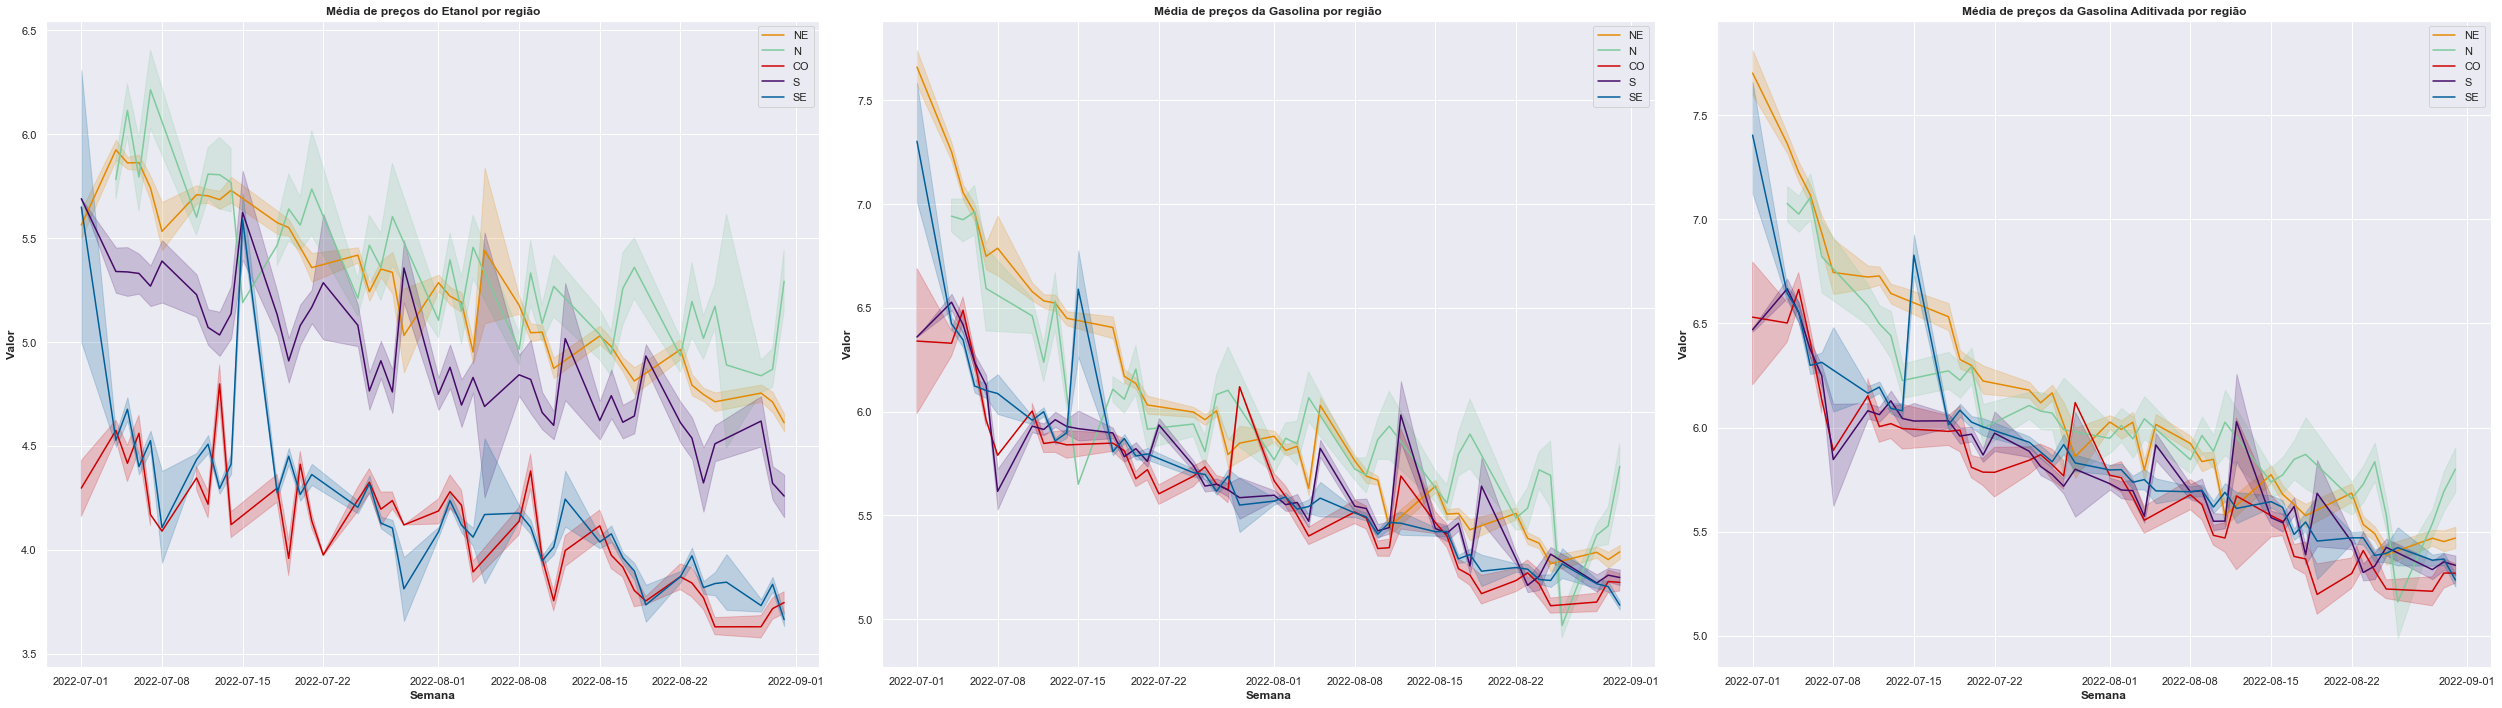

In [98]:
# Plotando os gráficos para cada tipo de combustível
figura = plt.figure(figsize=(35,10))

# Etanol
figura.add_subplot(131)
sns.lineplot(x=x_col, y=y_col, color=cornordeste, data=etanol.query("Regiao	== 'NE'"), label='NE')
sns.lineplot(x=x_col, y=y_col, color=cornorte, data=etanol.query('Regiao	== "N"'), label='N')
sns.lineplot(x=x_col, y=y_col, color=corcentro, data=etanol.query('Regiao	== "CO"'), label='CO')
sns.lineplot(x=x_col, y=y_col, color=corsul, data=etanol.query('Regiao == "S"'), label='S')
sns.lineplot(x=x_col, y=y_col, color=corsudeste, data=etanol.query('Regiao	== "SE"'), label='SE')

plt.title('Média de preços do Etanol por região', fontsize=12, fontweight='bold')
plt.ylabel('Valor', fontsize=12, fontweight='bold')
plt.xlabel('Semana', fontsize=12, fontweight='bold')

# Gasolina
figura.add_subplot(132)
sns.lineplot(x=x_col, y=y_col, color=cornordeste, data=gasolina.query('Regiao	== "NE"'), label='NE')
sns.lineplot(x=x_col, y=y_col, color=cornorte, data=gasolina.query('Regiao	== "N"'), label='N')
sns.lineplot(x=x_col, y=y_col, color=corcentro, data=gasolina.query('Regiao	== "CO"'), label='CO')
sns.lineplot(x=x_col, y=y_col, color=corsul, data=gasolina.query('Regiao == "S"'), label='S')
sns.lineplot(x=x_col, y=y_col, color=corsudeste, data=gasolina.query('Regiao	== "SE"'), label='SE')

plt.title('Média de preços da Gasolina por região', fontsize=12, fontweight='bold')
plt.ylabel('Valor', fontsize=12, fontweight='bold')
plt.xlabel('Semana', fontsize=12, fontweight='bold')

# Gasolina Aditivada
figura.add_subplot(133)
sns.lineplot(x=x_col, y=y_col, color=cornordeste, data=gasolina_aditivada.query('Regiao	== "NE"'), label='NE')
sns.lineplot(x=x_col, y=y_col, color=cornorte, data=gasolina_aditivada.query('Regiao	== "N"'), label='N')
sns.lineplot(x=x_col, y=y_col, color=corcentro, data=gasolina_aditivada.query('Regiao	== "CO"'), label='CO')
sns.lineplot(x=x_col, y=y_col, color=corsul, data=gasolina_aditivada.query('Regiao == "S"'), label='S')
sns.lineplot(x=x_col, y=y_col, color=corsudeste, data=gasolina_aditivada.query('Regiao	== "SE"'), label='SE')

plt.title('Média de preços da Gasolina Aditivada por região', fontsize=12, fontweight='bold')
plt.ylabel('Valor', fontsize=12, fontweight='bold')
plt.xlabel('Semana', fontsize=12, fontweight='bold')

plt.tight_layout()

<font color='FAFACC'>**_A partir da visualização dos gráficos, algumas características podem ser notadas:_**</font>

- Tivemos a tendência de redução do preço dos combustíveis no bimestre apontada na questão anterior demonstrada novamente, onde todos os três gráficos apontam por meio de suas linhas esse declínio de preços;

- Em todos os gráficos temos uma recorrência em relação a <font color='CECB05'>**região Nordeste (linha Amarela)**</font> e <font color='3CCE05'>**Norte (linha Verde)**</font>, onde essas duas regiões terminaram o intervalo analisado com os preços mais caros nos três combustíveis. Existem pontos em que essas regiões são ultrapassadas por outras, principalmente no caso da gasolina, mas no geral as duas regiões tem preços mais altos;

 
- Mais explícitamente no gráfico em relação ao Etanol porém presente em todos eles, a <font color='0E88F2'>**região Sudeste (Linha Azul)**</font> teve uma alta subita nos preços por volta do dia de 15/07/2022;

- Enquanto a região tem esse aumento súbito no dia 15, o inverso ocorre na mesma data na região Norte, onde os preços subitamente caem nesse período, porém no gráfico da gasolina aditivada esse fenômeno ocorre de maneira bem mais sutíl, tendo esse declínio bem mais leve nos preços da região Norte enquanto a região Sudeste tem seu pico.

**_Podemos ter uma visão tabular desses preços a seguir:_**

- <font color='FAFACC'>**_Tabulação de preços dos combustíveis por região nos meses de Julho e Agosto respectivamente:_**

In [29]:
# Criação dos DataFrames com os preços, produtos e siglas das regiões no mês de julho
relacao_comb_preco_jul = comb_jul[['Produto','Valor de Venda', 'Regiao - Sigla']].groupby(['Produto', 'Regiao - Sigla']).mean()
relacao_comb_preco_jul.columns = ['Preço Médio']
relacao_comb_preco_jul.sort_values(by='Produto', ascending=True,inplace = True)

# Dando usntack no DataFrame e subdividindo em três categorias
novo = relacao_comb_preco_jul.unstack().copy().T
novo_etanol = novo['Etanol']
novo_gas = novo['Gasolina']
novo_gasadt = novo['Gasolina Aditivada']

# Reorganizando o DataFrame original com os dados tabulares
relacao_comb_preco_jul = pd.DataFrame([novo_etanol,novo_gas,novo_gasadt])
relacao_comb_preco_jul = relacao_comb_preco_jul['Preço Médio'].T

print('MÉDIA DOS COMBUSTÍVEIS POR REGIÃO (JULHO):')
display(relacao_comb_preco_jul)
print()
print()

# Criação dos DataFrames com os preços, produtos e siglas das regiões no mês de Agosto
relacao_comb_preco_ago = comb_ago[['Produto','Valor de Venda', 'Regiao - Sigla']].groupby(['Produto', 'Regiao - Sigla']).mean()
relacao_comb_preco_ago.columns = ['Preço Médio']
relacao_comb_preco_ago.sort_values(by='Produto', ascending=True, inplace = True)

# Dando usntack no DataFrame e subdividindo em três categorias
novo = relacao_comb_preco_ago.unstack().copy().T
novo_etanol = novo['Etanol']
novo_gas = novo['Gasolina']
novo_gasadt = novo['Gasolina Aditivada']

# Reorganizando o DataFrame original com os dados tabulares
relacao_comb_preco_ago = pd.DataFrame([novo_etanol,novo_gas,novo_gasadt])
relacao_comb_preco_ago = relacao_comb_preco_ago['Preço Médio'].T

print('MÉDIA DOS COMBUSTÍVEIS POR REGIÃO (AGOSTO):')
display(relacao_comb_preco_ago)

MÉDIA DOS COMBUSTÍVEIS POR REGIÃO (JULHO):


,Etanol,Gasolina,Gasolina Aditivada
Regiao - Sigla,,,
CO,4.324710,5.894329,6.034480
N,5.637043,6.322346,6.457643
NE,5.605162,6.443064,6.600561
S,5.104525,5.939016,6.079456
SE,4.364011,5.926829,6.140690




MÉDIA DOS COMBUSTÍVEIS POR REGIÃO (AGOSTO):


,Etanol,Gasolina,Gasolina Aditivada
Regiao - Sigla,,,
CO,3.912062,5.301479,5.445814
N,5.098039,5.680932,5.808880
NE,4.925200,5.528224,5.681207
S,4.612057,5.373290,5.505014
SE,3.964701,5.343207,5.551107


##### **<font color ='gold'><font size=4>4.3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?</font>**

Para a resolução dessa questão, vamos primeiro abordar o preço médio dos combustíveis juntos por região, e depois, de cada combustível separado, para termos uma visão mais completa acerca dos valores.

- <font color='FAFACC'>**_Levando em consideração os 2 meses e os 2 combustíveis juntos, Gasolina(comum/aditivada) e Etanol:_**

In [30]:
# Criação de uma cópia do DataFrame original
dados_agrupados_estado = conjunto_dados.copy()

# Subdividindo a cópia para termos os dados necessários
media_combs_estados = dados_agrupados_estado.groupby(['Regiao - Sigla','Estado - Sigla'])[['Valor de Venda']].mean()
media_combs_estados.columns = ['Preço Médio']

print('5 ESTADOS COM O PREÇO MÉDIO DE TODOS OS COMBUSTÍVEIS JUNTOS:')
media_combs_estados.sort_values(by='Preço Médio', ascending=False).head()

5 ESTADOS COM O PREÇO MÉDIO DE TODOS OS COMBUSTÍVEIS JUNTOS:


Preço Médio
Regiao - Sigla Estado - Sigla             
N              RR                 6.020909
               PA                 5.998639
               AC                 5.996797
NE             CE                 5.867937
               RN                 5.852482

**_Para uma melhor visualização desses dados, vamos demonstrá-los num gráfico de barras:_**

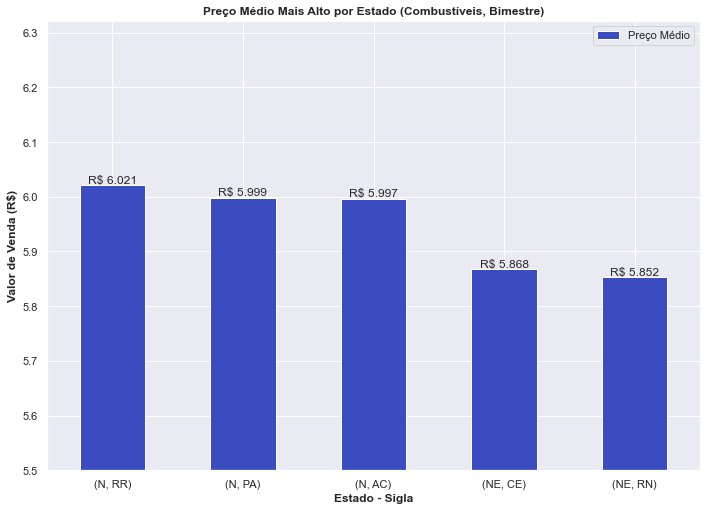

In [31]:
media_combs_estados.sort_values(by='Preço Médio', ascending=False).head().plot(kind='bar', ylim=5.5, colormap='coolwarm');

for index, values in enumerate(media_combs_estados['Preço Médio'].sort_values(ascending=False).head()):
    plt.text(index, values, str(f'R$ {values:.3f}'), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.title('Preço Médio Mais Alto por Estado (Combustíveis, Bimestre)', fontsize=12, fontweight='bold')
plt.ylabel('Valor de Venda (R$)', fontsize=12, fontweight='bold')
plt.xlabel('Estado - Sigla', fontsize=12, fontweight='bold')
plt.xticks(rotation=360)
plt.show()

**_Fazendo a média bimestral com a Gasolina, Gasolina Aditivada e o Etanol separados._**

- <font color='FAFACC'> **_Gasolina Aditivada_**

In [32]:
media_gas_adt_estado = dados_agrupados_estado.loc[dados_agrupados_estado['Produto'] == 'Gasolina Aditivada'].groupby(['Regiao - Sigla','Estado - Sigla'])

df_media_gas_adt_estado = media_gas_adt_estado[['Valor de Venda']].mean()
df_media_gas_adt_estado.columns = ['Preço Médio']

print('OS 5 ESTADOS COM O MAIOR PREÇO MÉDIO DE GASOLINA ADITIVADA NO BIMESTRE.')
display(df_media_gas_adt_estado.sort_values(by='Preço Médio', ascending=False).head())

OS 5 ESTADOS COM O MAIOR PREÇO MÉDIO DE GASOLINA ADITIVADA NO BIMESTRE.


Preço Médio
Regiao - Sigla Estado - Sigla             
NE             PI                 6.314518
               CE                 6.197571
N              AC                 6.177801
               TO                 6.176667
               PA                 6.174368

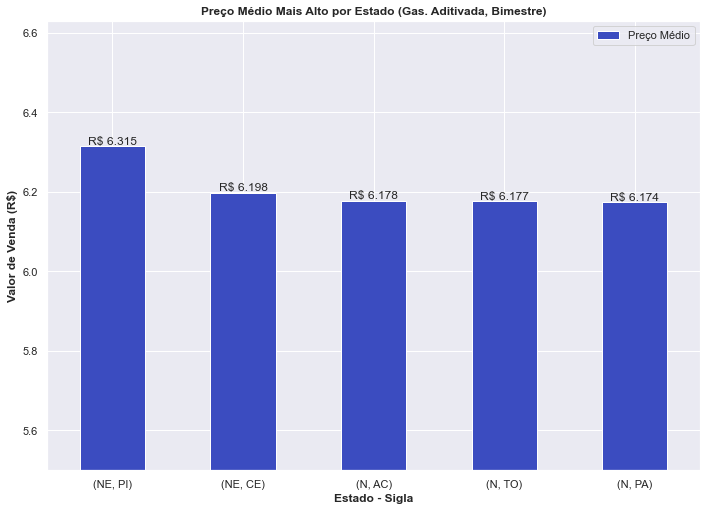

In [33]:
df_media_gas_adt_estado.sort_values(by='Preço Médio', ascending=False).head().plot(kind='bar', ylim=5.5, colormap='coolwarm');

for index, values in enumerate(df_media_gas_adt_estado['Preço Médio'].sort_values(ascending=False).head()):
    plt.text(index, values, str(f'R$ {values:.3f}'), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.title('Preço Médio Mais Alto por Estado (Gas. Aditivada, Bimestre)', fontsize=12, fontweight='bold')
plt.ylabel('Valor de Venda (R$)', fontsize=12, fontweight='bold')
plt.xlabel('Estado - Sigla', fontsize=12, fontweight='bold')
plt.xticks(rotation=360)
plt.show()

- <font color='FAFACC'> **_Gasolina_**

In [34]:
media_gas_estado = dados_agrupados_estado.loc[dados_agrupados_estado['Produto'] == 'Gasolina'].groupby(['Regiao - Sigla','Estado - Sigla'])
df_media_gas_estado = media_gas_estado[['Valor de Venda']].mean()
df_media_gas_estado.columns = ['Preço Médio']

print('OS 5 ESTADOS COM O MAIOR PREÇO MÉDIO DE GASOLINA COMUM NO BIMESTRE.')
print()
display(df_media_gas_estado.sort_values(by='Preço Médio', ascending=False).head())

OS 5 ESTADOS COM O MAIOR PREÇO MÉDIO DE GASOLINA COMUM NO BIMESTRE.



Preço Médio
Regiao - Sigla Estado - Sigla             
N              AC                 6.211454
               AM                 6.188049
NE             PI                 6.075050
N              TO                 6.046250
NE             BA                 6.030862

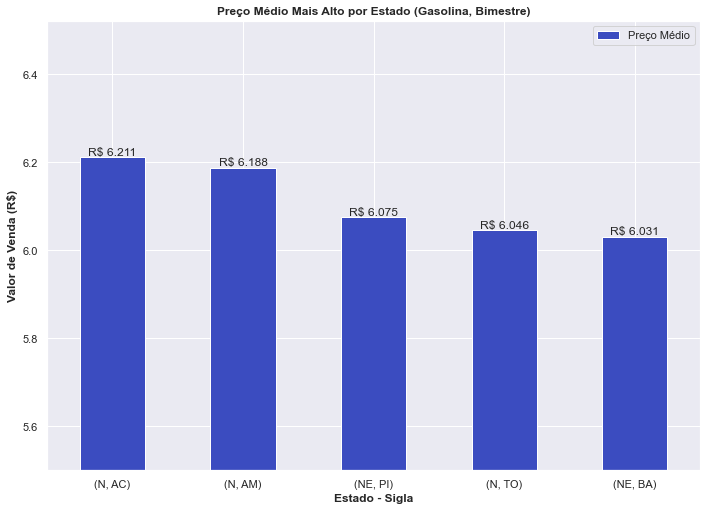

In [35]:
df_media_gas_estado.sort_values(by='Preço Médio', ascending=False).head().plot(kind='bar', ylim=5.5, colormap='coolwarm');

for index, values in enumerate(df_media_gas_estado['Preço Médio'].sort_values(ascending=False).head()):
    plt.text(index, values, str(f'R$ {values:.3f}'), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.title('Preço Médio Mais Alto por Estado (Gasolina, Bimestre)', fontsize=12, fontweight='bold')
plt.ylabel('Valor de Venda (R$)', fontsize=12, fontweight='bold')
plt.xlabel('Estado - Sigla', fontsize=12, fontweight='bold')
plt.xticks(rotation=360)
plt.show()

- <font color='FAFACC'> **_Etanol_**

In [36]:
media_etanol_estado = dados_agrupados_estado.loc[dados_agrupados_estado['Produto'] == 'Etanol'].groupby(['Regiao - Sigla','Estado - Sigla'])
df_media_etanol_estado = media_etanol_estado[['Valor de Venda']].mean()
df_media_etanol_estado.columns = ['Preço Médio']

print('OS 5 ESTADOS COM O MAIOR PREÇO MÉDIO DE ETANOL NO BIMESTRE.')
print()
display(df_media_etanol_estado.sort_values(by='Preço Médio', ascending=False).head())

OS 5 ESTADOS COM O MAIOR PREÇO MÉDIO DE ETANOL NO BIMESTRE.



Preço Médio
Regiao - Sigla Estado - Sigla             
N              AP                 5.896250
S              RS                 5.660152
N              PA                 5.624816
               RO                 5.599120
               RR                 5.568182

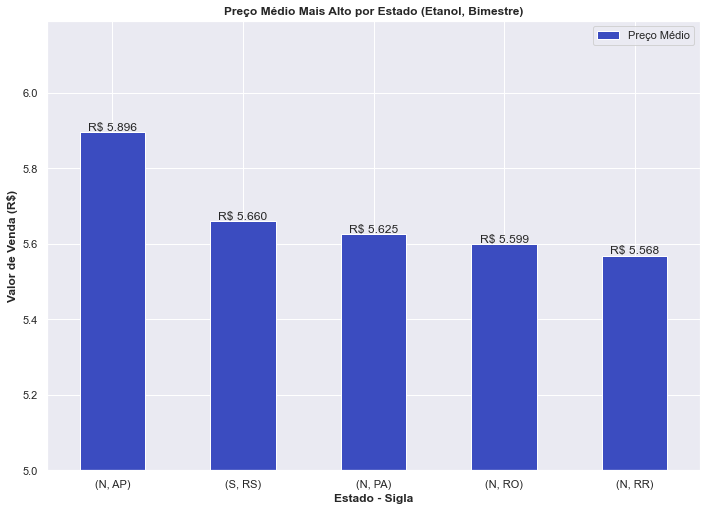

In [37]:
df_media_etanol_estado.sort_values(by='Preço Médio', ascending=False).head().plot(kind='bar', ylim=5.0, colormap='coolwarm');

for index, values in enumerate(df_media_etanol_estado['Preço Médio'].sort_values(ascending=False).head()):
    plt.text(index, values, str(f'R$ {values:.3f}'), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.title('Preço Médio Mais Alto por Estado (Etanol, Bimestre)', fontsize=12, fontweight='bold')
plt.ylabel('Valor de Venda (R$)', fontsize=12, fontweight='bold')
plt.xticks(rotation=360)
plt.xlabel('Estado - Sigla', fontsize=12, fontweight='bold')
plt.show()

Com a visualização gráfica dos três produtos, podemos notar algumas características:

- A <font color='3CCE05'>**região Norte (N)**</font> é a mais repetidas vezes aparente nos gráficos, contando com <font color='3CCE05'>13 registros</font>, sendo os estados mais presentes <font color='FAFACC'>**Acre (AC) e Pará (PA)**</font> com <font color='FAFACC'>**3 aparições**</font> cada;

- <font color='CECB05'>**A região Nordeste (NE)**</font> foi a segunda com mais aparições, contando com os estados do <font color='FAFACC'>**Ceará (CE) e Piauí (PI)**</font> com as maiores vezes presentes, <font color='FAFACC'>**2**</font>;

- A <font color='9F0EF2'>**região Sul (S)**</font> aparece apenas uma vez com o estado do <font color='FAFACC'>**Rio Grande do Sul (RS)**</font> somente na categoria de preços mais altos do Etanol, sendo o único registro de um estado que não está contido no eixo Norte - Nordeste do país;

Essas características apontam novamente a uma tendência de que os preços dos combustíveis são mais caros no geral na região Norte e Nordeste do Brasil.

##### **<font color ='gold'><font size=4>4.4. Qual o preço médio da gasolina e do etanol por estado?</font>**

Para realizarmos essa análise, iremos fazer a média bimestral da Gasolina,da Gasolina Aditivada e do Etanol por estado, depois, plotaremos gráficos para a visualização desses dados e análise posterior.

In [38]:
# Fazendo a média bimestral da Gasolina, Gasolina Aditivada e do Etanol.
df_media_comb_estado = pd.concat([df_media_gas_adt_estado, df_media_gas_estado, df_media_etanol_estado], axis=1)
df_media_comb_estado.columns = ['Gasolina Aditivada','Gasolina Comum','Etanol']

print('TABELA COM A MÉDIA DO PREÇO DE COMBUSTÍVEIS POR ESTADO:\n')
df_media_comb_estado.style.highlight_max(color='#CF0909', axis=0).highlight_min(color='#0C9E02')

TABELA COM A MÉDIA DO PREÇO DE COMBUSTÍVEIS POR ESTADO:



De acordo com a tabela, podemos ver as médias de preços mais altos e baixos registrados no país:

---

<font color='E8100D'>**_MÉDIA MAIS ALTA_**</font>

- **_Gasolina_**
  - Estado do Acre (AC) com a média de <font color='0CB213'>**`R$6.211`**</font>;

- **_Gasolina Aditivada_**
  - Estado do Piauí (PI) com a média de <font color='0CB213'>**`R$ 6.314`**</font>;

- **_Etanol_**
  - Estado do Amapá (AP) com a média de <font color='0CB213'>**`R$ 5.896`**</font>;

<font color='2EE80D'>**_MÉDIA MAIS BAIXA_**</font>

- **_Gasolina_**
  - Estado do Amapá (AP) com a média de <font color='0CB213'>**`R$ 5.107`**</font>;

- **_Gasolina Aditivada_**
  - Estado do Amapá (AP) com a média de <font color='0CB213'>**`R$ 5.433`**</font>;

- **_Etanol_**
  - Estado do Mato Grosso com a média de <font color='0CB213'>**`R$ 3.805`**</font>;

---

É notável a aparição do estado do Amapá, que possuí simultâneamente as médias de preços mais caras de Etanol e as médias de preços mais baratos de Gasolina e Gasolina Aditivada no país.

Isso pode indicar uma relação entre a distância/local do foco de produção do Etanol no Brasil que está localizado no eixo Sudeste - Centro e no litoral Nordeste*

Já a média de preços mais baixos da Gasolina comum e Aditivada não pode ser explicada pela distância/local do foco de produção/refinamento dos combustíveis, pois os mesmos estão focados em sua maioria na região Sudeste, o que supostamente o tornariam mais caros no estado. A relação causa e efeito dos preços mais baixos observados no Amapá dos combustíveis fosseis não é tão clara nos limites do escopo do projeto, sendo necessário uma análise mais profunda da questão que foje no objetivo da pesquisa em si.

*<font size=2>Informações baseadas no [Mapa Dinâmico de Produtores de Etanol no Brasil](https://www.gov.br/anp/pt-br/centrais-de-conteudo/paineis-dinamicos-da-anp/paineis-e-mapa-dinamicos-de-produtores-de-combustiveis-e-derivados), um PowerBI disponível no site Gov.br do Ministério de Minas e Energia.

<font color='FAFACC'>**_Gráfico de Barras_**

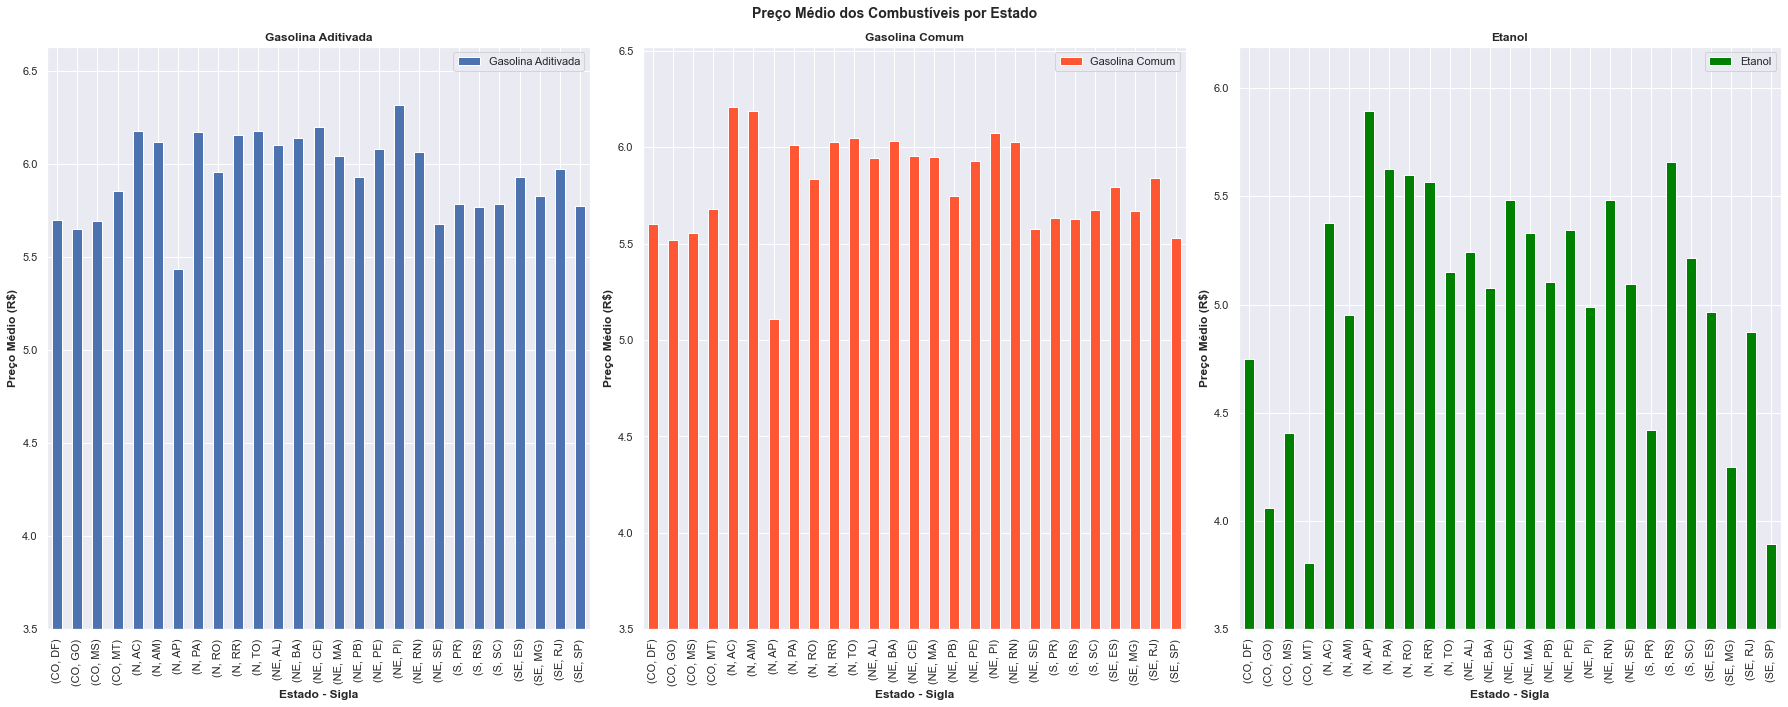

In [39]:
figura = plt.figure(figsize=(25,15))
figura.suptitle('Preço Médio dos Combustíveis por Estado', fontsize=14, fontweight='bold')

figura.add_subplot(131)
df_media_comb_estado['Gasolina Aditivada'].plot(kind='bar', figsize=(25,10), ylim = 3.5, ylabel = 'Preço Médio dos Combustíveis')
plt.ylabel('Preço Médio (R$)', fontsize=12, fontweight='bold')
plt.xlabel('Estado - Sigla', fontsize=12, fontweight='bold')
plt.legend()
plt.title('Gasolina Aditivada', fontsize=12, fontweight='bold')

figura.add_subplot(132)
df_media_comb_estado['Gasolina Comum'].plot(kind='bar', figsize=(25,10), ylim = 3.5, ylabel = 'Preço Médio dos Combustíveis', color='#FF5733')
plt.ylabel('Preço Médio (R$)', fontsize=12, fontweight='bold')
plt.xlabel('Estado - Sigla', fontsize=12, fontweight='bold')
plt.legend()
plt.title('Gasolina Comum', fontsize=12, fontweight='bold')

figura.add_subplot(133)
df_media_comb_estado['Etanol'].plot(kind='bar', figsize=(25,10), ylim = 3.5, ylabel = 'Preço Médio dos Combustíveis', color='green')
plt.ylabel('Preço Médio (R$)', fontsize=12, fontweight='bold')
plt.xlabel('Estado - Sigla', fontsize=12, fontweight='bold')
plt.legend()
plt.title('Etanol', fontsize=12, fontweight='bold')

plt.tight_layout()

##### **<font color ='gold'><font size=4>4.5. Qual o município que possui o menor preço para a gasolina e para o etanol?</font>**

In [40]:
# Primeiro, criamos um dataframe novo agrupando os dados de Produto e Municipio
produto_municipio = conjunto_dados.groupby(["Produto", "Estado - Sigla", 'Municipio'])

In [41]:
# Em seguida, extraimos apenas os valores mínimos, de acordo com a pergunta
min_municipio = produto_municipio[['Valor de Venda']].min()

# Criamos um dataframe contendo apenas os dados que retornavam as querys contendo Etanol e classificamos pelos valor de venda
min_municipio_etanol = min_municipio.query("Produto == 'Etanol'").sort_values(by='Valor de Venda').head(1)

# Criamos um dataframe contendo apenas os dados que retornavam as querys contendo Gasolina e classificamos pelos valor de venda
min_municipio_gas = min_municipio.query("Produto == 'Gasolina'").sort_values(by='Valor de Venda').head(1)

# Criamos um dataframe contendo apenas os dados que retornavam as querys contendo Gasolina Aditivada e classificamos pelos valor de venda
min_municipio_gas_adi = min_municipio.query("Produto == 'Gasolina Aditivada'").sort_values(by='Valor de Venda').head(1)

# Concatenamos os três arquivos
minimas = pd.concat([min_municipio_etanol, min_municipio_gas, min_municipio_gas_adi])
minimas.columns = ['Menor Preço']

print('MUNICÍPIOS COM O MENOR PREÇO DOS COMBUSTÍVEIS:')
print()
minimas

MUNICÍPIOS COM O MENOR PREÇO DOS COMBUSTÍVEIS:



,,,Menor Preço
Produto,Estado - Sigla,Municipio,
Etanol,SP,Presidente Prudente,2.89
Gasolina,RS,Passo Fundo,4.13
Gasolina Aditivada,RS,Passo Fundo,4.13


Temos na tabela explícito que os três municípios com o valor mais baixo registrado dos combustíveis, todos estão no eixo Sul-Sudeste, em São Paulo e no Rio Grande do Sul mais especificamente. 

##### **<font color ='gold'><font size=4>4.6. Qual o município que possui o maior preço para a gasolina e para o etanol?</font>**

In [42]:
# extraimos apenas os valores máximos, de acordo com a pergunta
max_municipio = produto_municipio[['Valor de Venda']].max()

# Criamos um dataframe contendo apenas os dados que retornavam as querys contendo Etanol, classificamos pelos valor de venda e resetamos o index na primeira linha
max_municipio_etanol = min_municipio.query("Produto == 'Etanol'").sort_values(by='Valor de Venda', ascending=False).head(1)

# Criamos um dataframe contendo apenas os dados que retornavam as querys contendo Gasolina, classificamos pelos valor de venda e resetamos o index na primeira linha
max_municipio_gas = max_municipio.query("Produto == 'Gasolina'").sort_values(by='Valor de Venda', ascending=False).head(1)

# Criamos um dataframe contendo apenas os dados que retornavam as querys contendo Gasolina Aditivada, classificamos pelos valor de venda e resetamos o index na primeira linha
max_municipio_gas_adi = max_municipio.query("Produto == 'Gasolina Aditivada'").sort_values(by='Valor de Venda', ascending=False).head(1)

# Concatenamos os três arquivos
maximas = pd.concat([max_municipio_etanol, max_municipio_gas, max_municipio_gas_adi])
maximas.columns = ['Maior Preço']

print('MUNICÍPIOS COM O MAIOR PREÇO DOS COMBUSTÍVEIS:')
print()
maximas

MUNICÍPIOS COM O MAIOR PREÇO DOS COMBUSTÍVEIS:



,,,Maior Preço
Produto,Estado - Sigla,Municipio,
Etanol,RS,Uruguaiana,6.19
Gasolina,TO,Gurupi,8.75
Gasolina Aditivada,RJ,Mage,9.27


Percebemos que dos três municípios, dois deles estão no eixo Sul-Sudeste novamente, no Rio de Janeiro e no Rio Grande do Sul, tendo apenas o município de Gurupi fora disso, localizado na região Norte no estado de Tocantins.

##### **<font color ='gold'><font size=4>4.7. Qual a região que possui o maior valor médio da gasolina?</font>**

Aqui iremos analisar tanto a Gasolina Comum quanto a Gasolina Aditivada.

- <font color='FAFACC'>**_Gasolina_**

In [43]:
# Criando uma cópia do DF original onde temos apenas os registros da Gasolina
df_gas = conjunto_dados.query('Produto == "Gasolina"').copy()

# Ordenando o novo dataframe com o valor de venda da gasolina por região
produtos_gas = df_gas.groupby(['Produto', 'Regiao - Sigla'])[['Valor de Venda']].mean()
produtos_gas.columns = ['Maior Valor Médio']

# Realizando Unstack do DataFrame
novo = produtos_gas.unstack(level = 0).copy()
novo_gas = novo['Maior Valor Médio']['Gasolina']

# Reorganizando o novo DataFrame
produtos_gas = pd.DataFrame([novo_gas])
produtos_gas = produtos_gas.T
produtos_gas = produtos_gas.rename(columns={'Gasolina':'Maior Média'})

print('MAIOR MÉDIA DE PREÇOS DA GASOLINA POR REGIÃO:')
print()
display(produtos_gas.style.highlight_max(color='#CF0909'))

MAIOR MÉDIA DE PREÇOS DA GASOLINA POR REGIÃO:



,Maior Média
Regiao - Sigla,
CO,5.581603
N,5.972082
NE,5.955809
S,5.641161
SE,5.615655


**_Para facilitar a visualização, vamos plotar um gráfico de barras com esses dados:_**

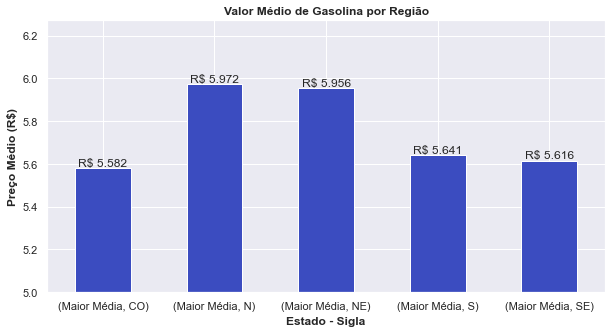

In [44]:
produtos_gas.unstack(level=0).plot(kind='bar', figsize=(10,5), layout=(2,3), ylim=5.0, cmap=('coolwarm'))

for index, values in enumerate(produtos_gas['Maior Média'].values):
    plt.text(index, values, str(f'R$ {values:.3f}'), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.ylabel('Preço Médio (R$)', fontsize=12, fontweight='bold')
plt.xlabel('Estado - Sigla', fontsize=12, fontweight='bold')
plt.xticks(rotation = 360)
plt.title('Valor Médio de Gasolina por Região', fontsize=12, fontweight='bold')
plt.show()

Podemos reparar novamente a prevalência das regiões Norte e Nordeste nos preços mais altos dos combustíveis, e também da região Centro-Oeste como tendo os preços mais baixos.

- <font color='FAFACC'>**_Gasolina Aditivada_**

In [45]:
# Criando uma cópia do DF original onde temos apenas os registros da Gasolina Aditivada
df_gas_adi = conjunto_dados.query('Produto == "Gasolina Aditivada"').copy()

# Ordenando o novo dataframe com o valor de venda da gasolina aditivada por região
produtos_gas_adi = df_gas_adi.groupby(['Produto', 'Regiao - Sigla'])[['Valor de Venda']].mean()
produtos_gas_adi.columns = ['Maior Valor Médio']

# Realizando Unstack do DataFrame
novo = produtos_gas_adi.unstack(level = 0).copy()
novo_gas_adi = novo['Maior Valor Médio']['Gasolina Aditivada']

# Reorganizando o novo DataFrame
produtos_gas_adi = pd.DataFrame([novo_gas_adi])
produtos_gas_adi = produtos_gas_adi.T
produtos_gas_adi = produtos_gas_adi.rename(columns={'Gasolina Aditivada':'Maior Média'})

print('MAIOR MÉDIA DE PREÇOS DA GASOLINA ADITIVADA POR REGIÃO:')
print()
display(produtos_gas_adi.style.highlight_max(color='#CF0909'))

MAIOR MÉDIA DE PREÇOS DA GASOLINA ADITIVADA POR REGIÃO:



,Maior Média
Regiao - Sigla,
CO,5.721266
N,6.105695
NE,6.109450
S,5.777628
SE,5.827207


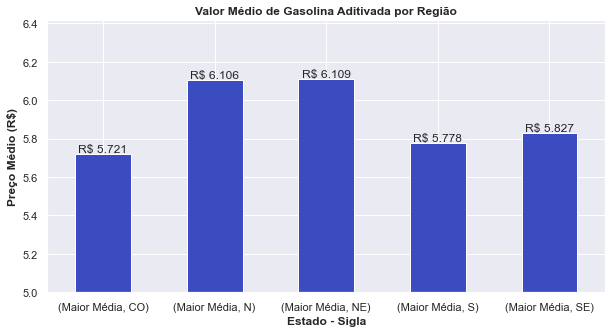

In [46]:
produtos_gas_adi.unstack(level=0).plot(kind='bar', figsize=(10,5), layout=(2,3), ylim=5.0,cmap=('coolwarm'))

for index, values in enumerate(produtos_gas_adi['Maior Média'].values):
    plt.text(index, values, str(f'R$ {values:.3f}'), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
    
plt.ylabel('Preço Médio (R$)', fontsize=12, fontweight='bold')
plt.xlabel('Estado - Sigla', fontsize=12, fontweight='bold')
plt.xticks(rotation = 360)
plt.title('Valor Médio de Gasolina Aditivada por Região', fontsize=12, fontweight='bold')
plt.show()

Podemos observar que o gráfico e os dados em relação a Gasolina Comum e a Gasolina Aditivada são muito semelhantes, tendo as regiões Norte e Nordeste com os valores mais altos e a região Centro-Oeste com o valor mais baixo.

Isso indica, além da já aparente relação entre região-preço, que os preços da Gasolina e da Gasolina Aditivada estão correlacionados positivamente, onde quando um tem uma tendência de variação, o outro tende a ter a mesma.

##### **<font color ='gold'><font size=4>4.8. Qual a região que possui o menor valor médio do etanol?</font>**

In [47]:
# Criando uma cópia do DF original onde temos apenas os registros do Etanol
df_etanol = conjunto_dados.query('Produto == "Etanol"').copy()

# Ordenando o novo dataframe com o valor de venda do etanol por região
produtos_etanol = df_etanol.groupby(['Produto', 'Regiao - Sigla'])[['Valor de Venda']].mean()
produtos_etanol.columns = ['Menor Valor Médio']

# Realizando Unstack do DataFrame
novo = produtos_etanol.unstack(level = 0).copy()
novo_et = novo['Menor Valor Médio']['Etanol']

# Reorganizando o novo DataFrame
produtos_etanol = pd.DataFrame([novo_et])
produtos_etanol = produtos_etanol.T
produtos_etanol = produtos_etanol.rename(columns={'Etanol':'Menor Média'}) 

print('MENORES PREÇOS MÉDIOS DO ETANOL POR REGIÃO:')
print()
display(produtos_etanol.style.highlight_min(color='#0C9E02'))

MENORES PREÇOS MÉDIOS DO ETANOL POR REGIÃO:



,Menor Média
Regiao - Sigla,
CO,4.107305
N,5.340633
NE,5.246069
S,4.842372
SE,4.149964


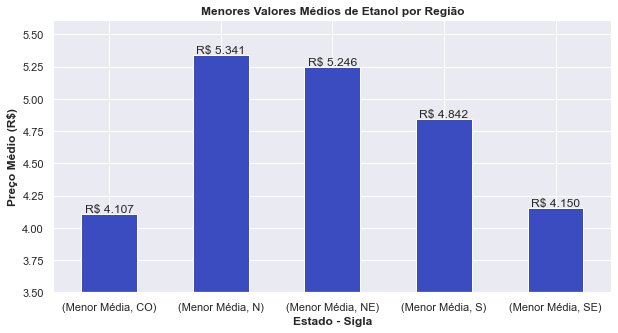

In [48]:
produtos_etanol.unstack(level=0).plot(kind='bar', figsize=(10,5), layout=(2,3), ylim=3.5,cmap=('coolwarm'))

for index, values in enumerate(produtos_etanol['Menor Média'].values):
    plt.text(index, values, str(f'R$ {values:.3f}'), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
    
plt.ylabel('Preço Médio (R$)', fontsize=12, fontweight='bold')
plt.xlabel('Estado - Sigla', fontsize=12, fontweight='bold')
plt.xticks(rotation = 360)
plt.title('Menores Valores Médios de Etanol por Região', fontsize=12, fontweight='bold')
plt.show()

A tendência reparada nos gráficos e dados da Gasolina e Gasolina Aditivada seguem aparente em relação ao Etanol. Regiões Norte e Nordeste com valores mais altos, Centro-Oeste com o valor mais baixo.

##### **<font color ='gold'><font size=4>4.9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?</font>**

Nessa análise, buscaremos compreender a relação entre os preços dos combustíveis e a região onde ele é vendido.

Com base nas análises feitas até aqui, temos a hipótese de que sim, existe uma tendência de correlação entre eles, aparente pelas inúmeras vezes em que as regiões Norte e Nordeste apareceram como tendo os preços mais caros e a região Centro-Oeste como tendo os preços mais baixos.

In [49]:
# Criando uma cópia do DF original onde temos os registros das médias dos valores dos combustíveis por região
media_combs_regiao = conjunto_dados.groupby(['Regiao - Sigla','Produto'])[['Valor de Venda']].mean()
media_combs_regiao.columns = ['Preço Médio']

# Realizando o Unstack do DataFrame
novo = media_combs_regiao.unstack().copy()
novo_etanol = novo['Preço Médio']['Etanol']
novo_gas = novo['Preço Médio']['Gasolina']
novo_gasadt = novo['Preço Médio']['Gasolina Aditivada']

# Reorganizando o novo DataFrame
novo_df = pd.DataFrame(data = [novo_etanol,novo_gas,novo_gasadt])
nova_media_combs_regiao = novo_df.swapaxes('index','columns')

print('MEDIA DOS PREÇOS DOS COMBUSTÍVEIS POR REGIÃO:')
print()
display(nova_media_combs_regiao)

MEDIA DOS PREÇOS DOS COMBUSTÍVEIS POR REGIÃO:



,Etanol,Gasolina,Gasolina Aditivada
Regiao - Sigla,,,
CO,4.107305,5.581603,5.721266
N,5.340633,5.972082,6.105695
NE,5.246069,5.955809,6.109450
S,4.842372,5.641161,5.777628
SE,4.149964,5.615655,5.827207


In [50]:
nova_media_combs_regiao

,Etanol,Gasolina,Gasolina Aditivada
Regiao - Sigla,,,
CO,4.107305,5.581603,5.721266
N,5.340633,5.972082,6.105695
NE,5.246069,5.955809,6.109450
S,4.842372,5.641161,5.777628
SE,4.149964,5.615655,5.827207


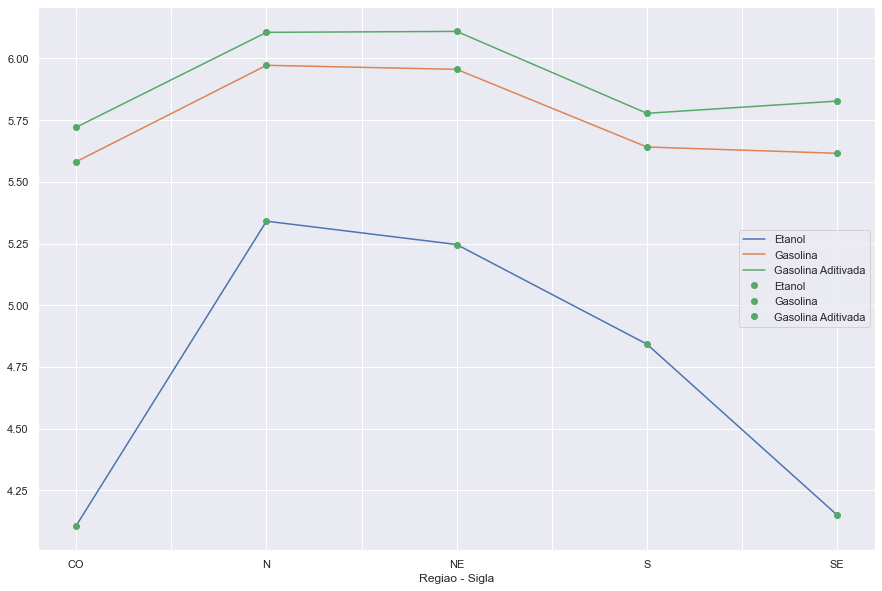

In [51]:
ax = nova_media_combs_regiao.plot()
nova_media_combs_regiao.plot(marker = 'o', linestyle = 'none', color = 'g', ax = ax, figsize=(15,10));

Com o gráfico podemos visualizar que a tendência de relação entre combustível-região é aparente, já que:

- **_ETANOL_**
  - O eixo Sudeste-Centro possui a média de preços mais baixas em relação ao Etanol. Isso pode ser indício da maior taxa de produção e exportação do produto no ano de 2022, [de acordo com análise realizada em Abril deste ano](https://diariodocomercio.com.br/economia/centro-sul-elevara-producao-de-etanol/).

  - Com o foco de produção do bio-combustível localizado nesta região, o fato dos preços serem consideravelmente mais baixos aqui do que em outras áreas do Brasil é uma proposição a ser considerada.

- **_GASOLINA E GASOLINA ADITIVADA_**
  - O primeiro fator a ser notado é a relação explícita no gráfico entre o preço dos dois produtos, tendo que suas linhas quase que duplicadas em suas semelhanças, sendo apenas notável a diferença nos preços entre as duas nas variações entre a região Sul e Sudeste.

Com essas análises e com o gráfico como um todo, podemos perceber que existe uma correlação aparente entre as regiões e os preços dos combustíveis, sendo essa correlação mais notável nos preços do Etanol, porém seus padrões (Norte e Nordeste mais caro, Centro-Oeste mais barato) seguem verdadeiras para Gasolina e Gasolina Aditivada.

##### **<font color ='gold'><font size=4>4.10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?</font>**

<font color='FAFACC'>**_Primeiramente, precisamos entender o que a Bandeira representa._**</font>

- A Bandeira no caso é a fornecedora de combustível. Quando um posto de gasolina assume um vínculo com uma Bandeira/marca ele não só deverá revender apenas combustíveis daquela marca, mas também terá que cumprir com os valores de revenda, identidade visual, leiautes e metas estabelecidos pela Bandeira;

- Entretanto, existem também os postos de bandeira branca ou postos sem bandeira, que não assumem um relacionamento com uma marca específica, dando mais liberdade para seus negociantes em suas tratativas, que podem encontrar valores mais baixos;

- Segundo os dados da **_Agência Nacional de Petróleo e Gás Natural e Biocombustíveis (ANP)_** no período de junho/2022 a julho/2022 47,3% dos postos são de bandeira branca, outros 43,2% são de grandes redes (BR, Ipiranga, Raízen e ALE) e apenas 11,3% pertencem a pequenas redes.

*<font size=2>Para mais informações sobre o ranking de bandeiras no Brasil, [clique aqui](https://blog.clubpetro.com/ranking-de-bandeiras-no-brasil-em-junho-de-2022/).

<font color='FAFACC'>**_Com esse entendendimento prévio acerca da divisão das bandeiras, faremos duas análises:_**

- A primeira comparando o valor médio dos combustíveis dos postos sem bandeira (Bandeira Branca);

- O mesmo processo para os os postos bandeirados onde a diferença de valores pode chegar a 5%, tendo todos os combustíveis de postos bandeirados com valores maiores.

In [52]:
# Criando um DataFrame para os dados e valores médios de Bandeira Branca
media_band_branca = conjunto_dados.loc[(conjunto_dados['Bandeira'] == 'Branca'), ['Bandeira','Produto', 'Valor de Venda']].groupby('Produto').mean()
media_band_branca.columns = ['Bandeira Branca']
media_band_branca

# Criando um DataFrame para os dados e valores médios de redes Bandeiradas
bandeirados = conjunto_dados.query('Bandeira != "Branca"')
media_bandeirados = bandeirados[['Bandeira','Produto', 'Valor de Venda']].groupby('Produto').mean()
media_bandeirados.columns = ['Bandeirados']
media_bandeirados

# Combinando os dois DataFrames 
media_combs_band = pd.merge(media_band_branca, media_bandeirados, how = 'inner', on = 'Produto')
media_combs_band = media_combs_band.T
media_combs_band.reset_index(inplace=True)
media_combs_band

Produto,index,Etanol,Gasolina,Gasolina Aditivada
0,Bandeira Branca,4.373859,5.645761,5.762779
1,Bandeirados,4.593294,5.753074,5.944606


<font color='FAFACC'>**_Plotando gráfico de barras para melhor visualização:_**

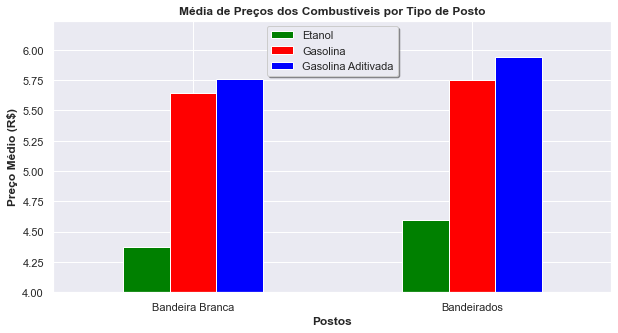

In [53]:
ax = media_combs_band.plot(x = 'index', y = ['Etanol','Gasolina','Gasolina Aditivada'], kind ='bar', figsize=(10,5), ylim=4.0, color=['green', 'red', 'blue'])

ax.legend(loc='upper center',fancybox=True, shadow=True, ncol=1)
plt.xticks(rotation = 360)
plt.xlabel('Postos', fontweight ='bold')
plt.ylabel('Preço Médio (R$)', fontsize=12, fontweight='bold')
plt.title('Média de Preços dos Combustíveis por Tipo de Posto', fontsize=12, fontweight='bold')
plt.show()

Já na segunda análise, feita entre os postos com bandeiras de **grandes e pequenas redes**, a diferença no valor médio do etanol, por exemplo, pode chegar a ser 8% mais caro para consumidores das pequenas redes, no entanto, a gasolina aditivada quase não apresenta variações.

In [54]:
# Criando um DataFrame para os dados e valores médios de Bandeiras Grandes
band_grandes = conjunto_dados.query('Bandeira == "Raizen" or Bandeira == "Ipiranga" or Bandeira == "Alesat" or Bandeira == "Vibra Energia"')
media_band_grandes = band_grandes[['Bandeira','Produto', 'Valor de Venda']].groupby('Produto').mean()
media_band_grandes.columns = ['Grandes Redes']
media_band_grandes

# Criando um DataFrame para os dados e valores médios de Bandeiras Pequenas
outras_band = conjunto_dados.query('Bandeira != "Raizen" & Bandeira != "Ipiranga" & Bandeira != "Alesat" & Bandeira != "Vibra Energia" & Bandeira != "Branca"')
media_outras_band = outras_band[['Bandeira','Produto', 'Valor de Venda']].groupby('Produto').mean()
media_outras_band.columns = ['Pequenas Redes']
media_outras_band

# Combinando os dois DataFrames 
media_combs_band2 = pd.merge(media_outras_band, media_band_grandes, how = 'inner', on = 'Produto')
media_combs_band2 = media_combs_band2.T
media_combs_band2.reset_index(inplace=True)
media_combs_band2

Produto,index,Etanol,Gasolina,Gasolina Aditivada
0,Pequenas Redes,4.960339,5.822558,5.927274
1,Grandes Redes,4.556882,5.744304,5.946663


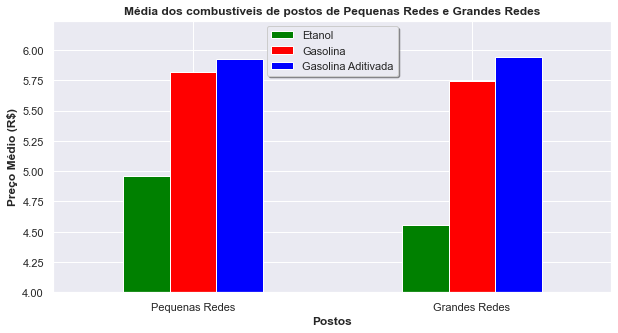

In [55]:
ax = media_combs_band2.plot(x = 'index', y = ['Etanol','Gasolina','Gasolina Aditivada'], kind ='bar', figsize=(10,5), ylim=4.0,  color=['green', 'red', 'blue'])

ax.legend(loc='upper center',fancybox=True, shadow=True, ncol=1)
plt.xticks(rotation = 360)
plt.xlabel('Postos', fontweight ='bold')
plt.ylabel('Preço Médio (R$)', fontsize=12, fontweight='bold')
plt.title('Média dos combustíveis de postos de Pequenas Redes e Grandes Redes', fontsize=12, fontweight='bold')
plt.show()

## **<font color ='gold'><font size=4>5. Análises Extras</font>**

Durante a exploração desse DataSet, possuíamos algumas outras questões que achamos interessantes de serem abordadas para termos mais informações ainda, com isso em mente, chegamos nas seguintes proposições de análise:

##### **<font color ='gold'><font size=4>5.1. Qual dia da semana possui o valor dos combustíveis mais caros?</font>**

- <font color='FAFACC'>**_Inicialmente fizemos um dataframe agrupando a média do valor de venda por dias da semana. Foi verificado que os dados estão contidos em dias úteis._**

In [56]:
venda_semana = conjunto_dados.groupby(['Dias da Semana'])[['Valor de Venda']].mean()

# Classificamos pelo Valor de venda para o maior número
venda_semana.sort_values('Valor de Venda', inplace=True, ascending=False)
venda_semana = venda_semana.rename(columns={'Valor de Venda':'Média'})

print('MÉDIA DOS PREÇOS DOS COMBUSTÍVEIS POR DIA DA SEMANA:')
print()
display(venda_semana.style.background_gradient(cmap='Reds'))

MÉDIA DOS PREÇOS DOS COMBUSTÍVEIS POR DIA DA SEMANA:



,Média
Dias da Semana,
Sexta,5.444217
Segunda,5.394295
Terça,5.392598
Quarta,5.307497
Quinta,5.293054


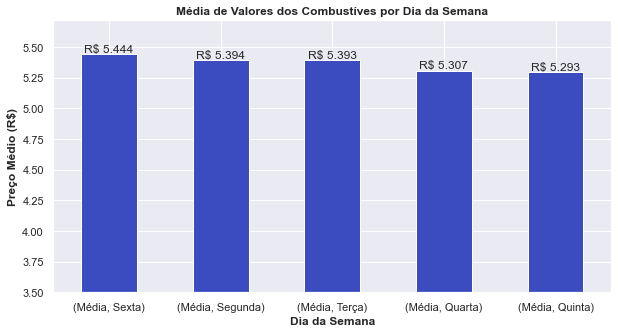

In [57]:
venda_semana.unstack(level=0).plot(kind='bar', figsize=(10,5), layout=(2,3), ylim=3.5,cmap=('coolwarm'))

for index, values in enumerate(venda_semana['Média'].values):
    plt.text(index, values, str(f'R$ {values:.3f}'), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
    
plt.ylabel('Preço Médio (R$)', fontsize=12, fontweight='bold')
plt.xlabel('Dia da Semana', fontsize=12, fontweight='bold')
plt.xticks(rotation = 360)
plt.title('Média de Valores dos Combustíves por Dia da Semana', fontsize=12, fontweight='bold')
plt.show()

De acordo com os dados, o dia da semana onde a média dos preços do combustíveis tendem a ser mais caros é na Sexta-Feira, sendo o mais barato o dia anterior, Quinta-Feira.

- <font color='FAFACC'>**_Porém, achamos interessante mostrar também esses dados com os três combustíveis separados por dia da semana:_**

In [58]:
# Para os combustiveis separadamente
venda_produto_semana = conjunto_dados.groupby(['Dias da Semana', 'Produto'])[['Valor de Venda']].mean()
venda_produto_semana.columns = ['Média']

#vendaprodutosemana.sort_values('Média',inplace=True,ascending=False)
print('MÉDIA DOS PREÇOS DOS COMBUSTÍVEIS POR DIA DA SEMANA:')
print()
display(venda_produto_semana.style.background_gradient(cmap='Reds'))

# Gasolina aditivada na sexta é o valor mais caro.

MÉDIA DOS PREÇOS DOS COMBUSTÍVEIS POR DIA DA SEMANA:



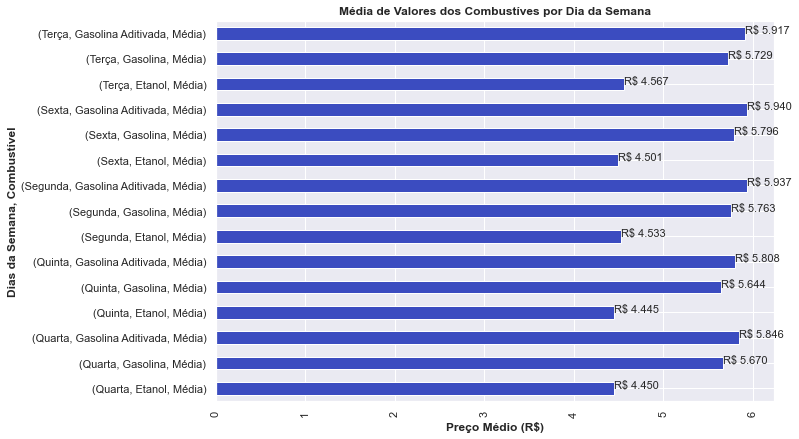

In [59]:
venda_produto_semana.T.unstack(level=0).plot(kind='barh', figsize=(10,7), layout=(2,3), ylim=3.5,cmap=('coolwarm'))

for index, value in enumerate(venda_produto_semana['Média']):
    plt.text(value, index, str(f'R$ {value:.3f}'), fontdict={'fontweight':400, 'size':11})
    
plt.ylabel('Dias da Semana, Combustível', fontsize=12, fontweight='bold')
plt.xlabel('Preço Médio (R$)', fontsize=12, fontweight='bold')
plt.xticks(rotation=90)
plt.title('Média de Valores dos Combustíves por Dia da Semana', fontsize=12, fontweight='bold')
plt.show()

[texto do link](https://) Com o gráfico, temos as seguintes informações acerca dos produtos:

 <font color='2EE80D'>**_DIA MAIS BARATO_**</font>
  - **_Etanol_**
      - Quinta-Feira no valor médio de <font color='0CB213'>**`R$ 4.445`**</font>;
    
  - **_Gasolina_**
      - Quinta-Feira no valor médio de <font color='0CB213'>**`R$ 5.644`**</font>;

  - **_Gasolina Aditivada_**
      - Quinta-Feira no valor médio de <font color='0CB213'>**`R$ 5.808`**</font>;

<font color='E8100D'>**_DIA MAIS CARO_**</font>
  - **_Etanol_**
    - Terça-Feira no valor médio de <font color='0CB213'>**`R$ 4.567`**</font>;
  
  - **_Gasolina_**
    - Sexta-Feira no valor médio de <font color='0CB213'>**`R$ 5.796`**</font>;

  - **_Gasolina Aditivda_**
    - Sexta-Feira no valor médio de <font color='0CB213'>**`R$ 5.940`**</font>;


##### **<font color ='gold'><font size=4>5.2. Qual o Estado que possui o maior valor médio dos combustíveis?</font>**

Para essa questão, iremos fazer um mapa coroplético buscando ter uma visão final de todos os dados e informações que vimos até aqui, de forma a ter uma apresentação diferenciada dos resultados das análises.

- <font color='FAFACC'> **_Nessa variável, o usuário pode inserir qualquer um dos três produtos, que vai determinar em base em quais valores o mapa sera gerado;_**

In [60]:
combustivel = 'Gasolina'  # Teste com: 'Gasolina', 'Etanol', 'Gasolina Aditivada'

- <font color='FAFACC'> **_Agora, iremos criar um novo DataFrame que contém o Município, o Estado e a média dos preços do combustível selecionado na variável acima;_**

In [61]:
todos_municipios_geo = conjunto_dados[conjunto_dados['Produto'] == combustivel].groupby(['Municipio','Estado - Sigla'])[['Valor de Venda']].mean()
todos_municipios_geo = todos_municipios_geo.reset_index().round(3)

- <font color='FAFACC'> **_Criando uma lista com todas as capitais de cada estado, isso foi feito para podermos pegar a geo-localização delas;_**

In [62]:
capitais = ['Porto Velho','Manaus','Rio Branco','Campo Grande','Macapa','Brasilia','Boa Vista','Cuiaba','Palmas','Sao Paulo',
            'Teresina','Rio De Janeiro','Belem','Goiania','Salvador','Florianopolis','Sao Luis','Maceio','Porto Alegre','Curitiba',
            'Belo Horizonte','Fortaleza','Recife','Joao Pessoa','Aracaju','Natal','Vitoria']

# Iterando sobre as linhas do DataFrame e coletando as informações de cada registro em cada capital
capitais_dados = []
for index, dados in todos_municipios_geo.iterrows():
     if dados[0].title() in capitais:
        capitais_dados.append(dados)
        
# Passando essa nova lista para um DataFrame       
capitais_dados = pd.DataFrame(capitais_dados)
todos_municipios_geo = capitais_dados.round(3)

tabela = todos_municipios_geo

- <font color='FAFACC'> **_Utilizando a biblioteca Folium, vamos dar início a criação do nosso mapa;_**

In [63]:
brasil = folium.Map(
    location=[-16.1237611, -59.9219642],    # Coordenadas retiradas do Google Maps
    zoom_start=4   # Define o nível de zoom do mapa no carregamento, o default é 10
)

- <font color='FAFACC'> **_Coletando as coordenadas geográficas (Latitude e Longitude) por nome de cidade utilizando a biblioteca GeoPy;_**

In [64]:
saida = []
for index, dados in tabela.iterrows():
    loc = Nominatim(user_agent="GetLoc") 
    getLoc = loc.geocode(f'{dados[0]} {dados[1]} Brasil')
    location = getLoc
    saida.append([[location.latitude, location.longitude], f'{dados[0]}:{round(dados[2],2)}'])

- <font color='FAFACC'> **_Com base nessas coordenadas, podemos inserir marcadores no mapa do Brasil;_**

In [65]:
mapa = brasil
tabela = tabela.rename(columns={'Estado - Sigla': 'UF'})
url = (
    "https://raw.githubusercontent.com/luizpedone/municipal-brazilian-geodata/master/data" # Repositório que contém as coordenadas
)

# Definindo características do mapa
state_geo = f"{url}/Brasil.json"
folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=tabela,
    columns=['UF', 'Valor de Venda'],
    key_on="feature.properties.UF",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Média"
).add_to(mapa)

folium.LayerControl().add_to(mapa)

mapa